In [45]:
import pandas as pd
import numpy as np

In [46]:
AAB_pred = pd.read_csv("mean_shaps_AAB.csv")
AGF_pred = pd.read_csv("mean_shaps_AGF.csv")
BIF_pred = pd.read_csv("mean_shaps_BIF.csv")
FCK_pred = pd.read_csv("mean_shaps_FCK.csv")
FCM_pred = pd.read_csv("mean_shaps_FCM.csv")
FCN_pred = pd.read_csv("mean_shaps_FCN.csv")
LYN_pred = pd.read_csv("mean_shaps_LYN.csv")
RFC_pred = pd.read_csv("mean_shaps_RFC.csv")
SIF_pred = pd.read_csv("mean_shaps_SIF.csv")
SJE_pred = pd.read_csv("mean_shaps_SJE.csv")
VB_pred = pd.read_csv("mean_shaps_VB.csv")
VFF_pred = pd.read_csv("mean_shaps_VFF.csv")

In [47]:
AAB = [24,21,14,16,37,2,23,9,26,17,6,27,20,11,4,33,28,1,5,31,13,10,19,8,22]
AGF = [22,1,32,19,40,14,5,3,27,26,10,7,8,16,29,2,11,23,17,20,39,31,15,9]
BIF = [1,13,16,32,5,30,34,24,43,31,2,6,8,35,10,37,28,7,11,36,17]
FCK = [41,1,31,5,2,6,4,20,24,15,13,22,36,8,12,17,27,33,38,48,30,16,40,10,11,7,14,19]
FCM = [16,1,30,4,22,3,29,55,15,43,6,13,80,24,21,19,58,41,11,14,38,20,7,18,10]
FCN = [13,38,31,3,24,4,15,34,45,25,30,2,6,18,8,21,12,20,36,27,29,11,22,7,10,17]
LYN = [40,32,5,12,6,4,20,3,24,2,23,13,14,19,8,22,17,15,21,11,27,9,26,29,18]
RFC = [1,25,22,4,24,3,5,23,44,27,15,28,6,14,16,9,18,30,20,10,17,11,90,7,26,19]
SIF = [1,30,4,40,25,24,2,3,19,8,21,20,6,33,11,41,14,7,10,17,23,9]
SJE = [1,16,45,12,4,2,5,30,23,13,20,22,3,6,26,31,7,8,28,10,17,11,24,15,25,14,9]
VB = [1,24,99,29,14,13,22,38,3,59,25,2,16,23,34,8,71,5,17,11,10,7,37,45,33,9,18]
VFF = [1,16,5,24,55,2,32,23,3,18,30,26,13,12,19,6,37,15,10,27,7,8,17,14,11]

In [48]:
def filter_players_by_team_numbers(df, team_name, valid_numbers):
    # Build the valid player names for the team
    valid_players = {f"{team_name}player_{n}" for n in valid_numbers}
    # Keep only rows where player is not from this team or is in the valid list
    return df[~((df['player'].str.startswith(f"{team_name}player_")) & (~df['player'].isin(valid_players)))]

# Example usage for all teams
team_arrays = {
    'AAB': AAB,
    'AGF': AGF,
    'BIF': BIF,
    'FCK': FCK,
    'FCM': FCM,
    'FCN': FCN,
    'LYN': LYN,
    'RFC': RFC,
    'SIF': SIF,
    'SJE': SJE,
    'VB': VB,
    'VFF': VFF
}

filtered_df = combined_df.copy()
for team, numbers in team_arrays.items():
    filtered_df = filter_players_by_team_numbers(filtered_df, team, numbers)

filtered_df.reset_index(drop=True, inplace=True)

In [49]:
#all_dfs = [AAB, AGF, BIF, FCK, FCM, FCN, RFC, SIF, SJE, VB, VFF, LYN]
combined_df = pd.concat(all_dfs)
mean_shap_df = combined_df.groupby('player').mean().reset_index()

In [50]:
combined_df

,player,shap_importance
0,VFFplayer_4,0.435468
1,VFFplayer_16,0.411138
2,VFFplayer_24,0.351764
3,VFFplayer_2,0.344903
4,SJEplayer_12,0.316172
...,...,...
66,VBplayer_59,0.000000
67,RFCplayer_30,0.000000
68,LYNplayer_11,0.000000
69,VBplayer_11,0.000000


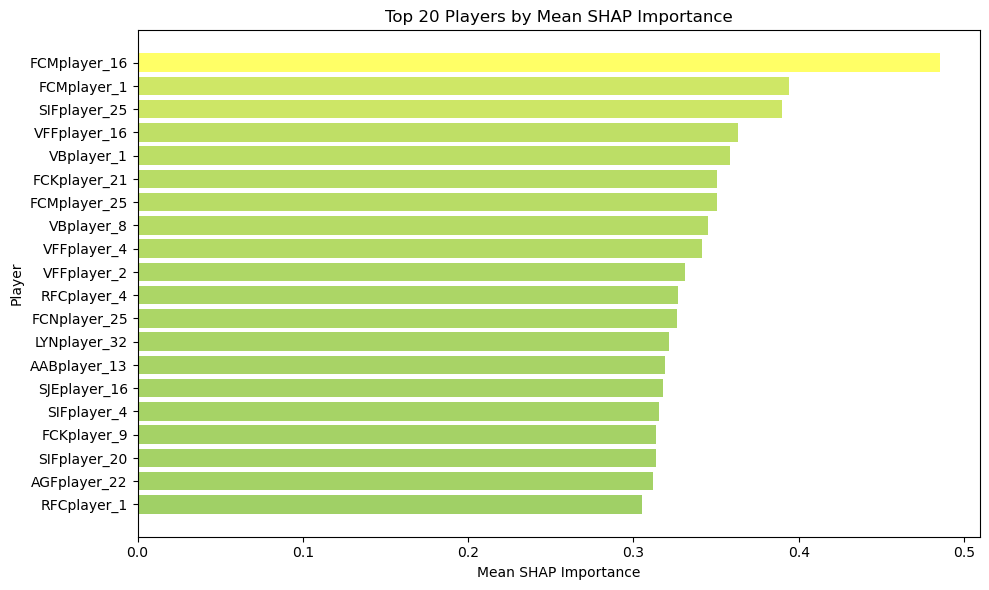

In [51]:
import matplotlib.pyplot as plt

top20 = mean_shap_df.sort_values('shap_importance', ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.barh(top20['player'], top20['shap_importance'], color='skyblue')
plt.xlabel('Mean SHAP Importance')
plt.ylabel('Player')
plt.title('Top 20 Players by Mean SHAP Importance')
plt.gca().invert_yaxis()
bars = plt.barh(top20['player'], top20['shap_importance'], color=plt.cm.summer(top20['shap_importance'] / top20['shap_importance'].max()))
plt.tight_layout()
plt.show()